In [47]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten # type: ignore
from tensorflow.keras.models import Sequential # type: ignore

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

 # All from https://www.tensorflow.org/tutorials/keras/classification

In [41]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [42]:
# Adding names to classes, we only have numbers
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [43]:
# Greyscale
train_images = train_images/255
test_images = test_images/255

NameError: name 'train_images' is not defined

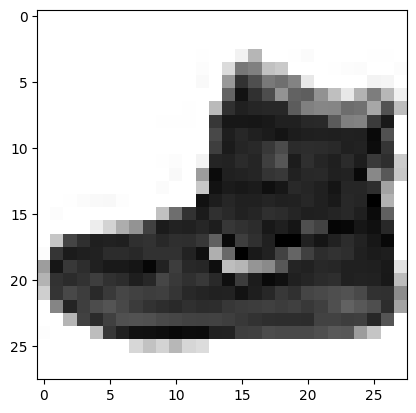

In [44]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show()

## Building the model

## Setting up the layers

In [65]:

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Different setup with other layers (https://github.com/guilhermedom/cnn-fashion-mnist/blob/main/notebooks/1.0-gdfs-cnn-fashion-mnist.ipynb):
'''
cnn_model = Sequential()

cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(layers.MaxPool2D(pool_size=(2, 2)))

cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPool2D(pool_size=(2, 2)))

cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

cnn_model.add(layers.Flatten())

# Each fully connected has half its input as its number of neurons.
cnn_model.add(layers.Dense(250, activation='relu'))
cnn_model.add(layers.Dense(125, activation='relu'))
cnn_model.add(layers.Dense(60, activation='relu'))

# 10 neurons in the last layer as we have 10 classes.
cnn_model.add(layers.Dense(10, activation='softmax'))

cnn_model.summary()
'''

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

### Compiling the model

In [66]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
# Other method
'''
early_stopping_callback = callbacks.EarlyStopping(patience=10)
batch_size = X_train.shape[0] // 20


cnn_model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
'''

### Training the model

In [67]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.15)

Epoch 1/10
1594/1594 [==============================] - 1s 602us/step - loss: 0.5125 - accuracy: 0.8194 - val_loss: 0.4065 - val_accuracy: 0.8559
Epoch 2/10
1594/1594 [==============================] - 1s 556us/step - loss: 0.3864 - accuracy: 0.8615 - val_loss: 0.3859 - val_accuracy: 0.8609
Epoch 3/10
1594/1594 [==============================] - 1s 523us/step - loss: 0.3433 - accuracy: 0.8765 - val_loss: 0.3291 - val_accuracy: 0.8812
Epoch 4/10
1594/1594 [==============================] - 1s 531us/step - loss: 0.3177 - accuracy: 0.8841 - val_loss: 0.3439 - val_accuracy: 0.8758
Epoch 5/10
1594/1594 [==============================] - 1s 523us/step - loss: 0.3011 - accuracy: 0.8896 - val_loss: 0.3419 - val_accuracy: 0.8749
Epoch 6/10
1594/1594 [==============================] - 1s 524us/step - loss: 0.2856 - accuracy: 0.8948 - val_loss: 0.3381 - val_accuracy: 0.8804
Epoch 7/10
1594/1594 [==============================] - 1s 524us/step - loss: 0.2737 - accuracy: 0.8983 - val_loss: 0.3196 -

In [57]:
# Other way
batch_size = 100
epochs_info = cnn_model.fit(train_images,
                            train_labels,
                            epochs=20,
                            batch_size=batch_size, validation_split=0.15)

Epoch 1/20
510/510 [==============================] - 8s 15ms/step - loss: 0.0637 - accuracy: 0.9757 - val_loss: 0.2271 - val_accuracy: 0.9326
Epoch 2/20
510/510 [==============================] - 8s 15ms/step - loss: 0.0555 - accuracy: 0.9794 - val_loss: 0.3190 - val_accuracy: 0.9227
Epoch 3/20
510/510 [==============================] - 8s 16ms/step - loss: 0.0581 - accuracy: 0.9781 - val_loss: 0.2676 - val_accuracy: 0.9293
Epoch 4/20
510/510 [==============================] - 8s 15ms/step - loss: 0.0488 - accuracy: 0.9813 - val_loss: 0.2660 - val_accuracy: 0.9277
Epoch 5/20
510/510 [==============================] - 8s 16ms/step - loss: 0.0469 - accuracy: 0.9826 - val_loss: 0.2764 - val_accuracy: 0.9261
Epoch 6/20
510/510 [==============================] - 8s 15ms/step - loss: 0.0425 - accuracy: 0.9838 - val_loss: 0.3219 - val_accuracy: 0.9269
Epoch 7/20
510/510 [==============================] - 8s 17ms/step - loss: 0.0430 - accuracy: 0.9849 - val_loss: 0.3117 - val_accuracy: 0.9252

### Evaulate accuracy

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3406 - accuracy: 0.8797 - 158ms/epoch - 506us/step

Test accuracy: 0.8797000050544739


### Plot the accuracy

In [1]:
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')


NameError: name 'plt' is not defined

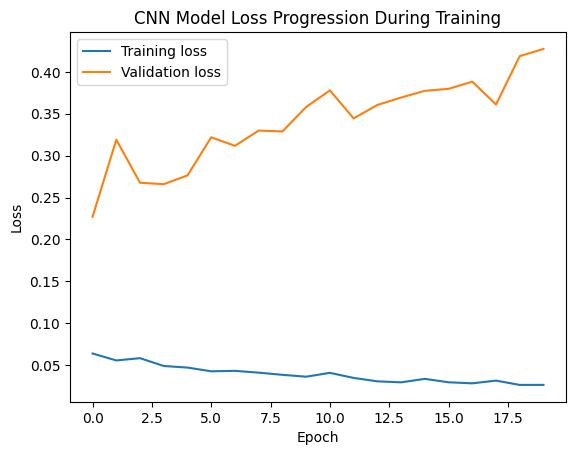

In [58]:
#Other method

plt.plot(epochs_info.history['loss'])
plt.plot(epochs_info.history['val_loss'])
plt.title("CNN Model Loss Progression During Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training loss", "Validation loss"])
plt.show()

### Make predictions

In [13]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [14]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 268us/step


Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:


In [15]:
predictions[0]

array([2.2919389e-04, 1.3033940e-06, 1.6257411e-06, 2.8793212e-09,
       1.9555200e-06, 1.6846726e-02, 1.4379299e-05, 1.5798392e-02,
       2.7252629e-05, 9.6707928e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:



In [16]:
np.argmax(predictions[0])


9

So, the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test label shows that this classification is correct:

In [17]:
test_labels[0]

9

Define functions to graph the full set of 10 class predictions.



In [18]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Verify predictions
With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label

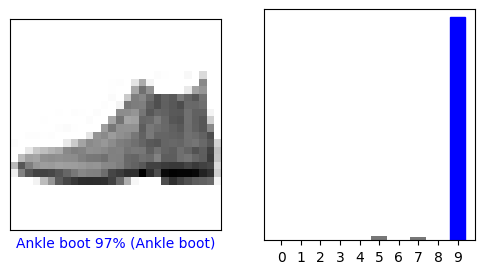

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

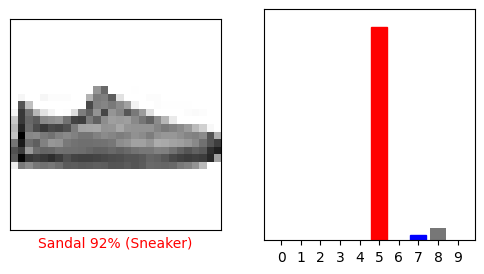

In [20]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

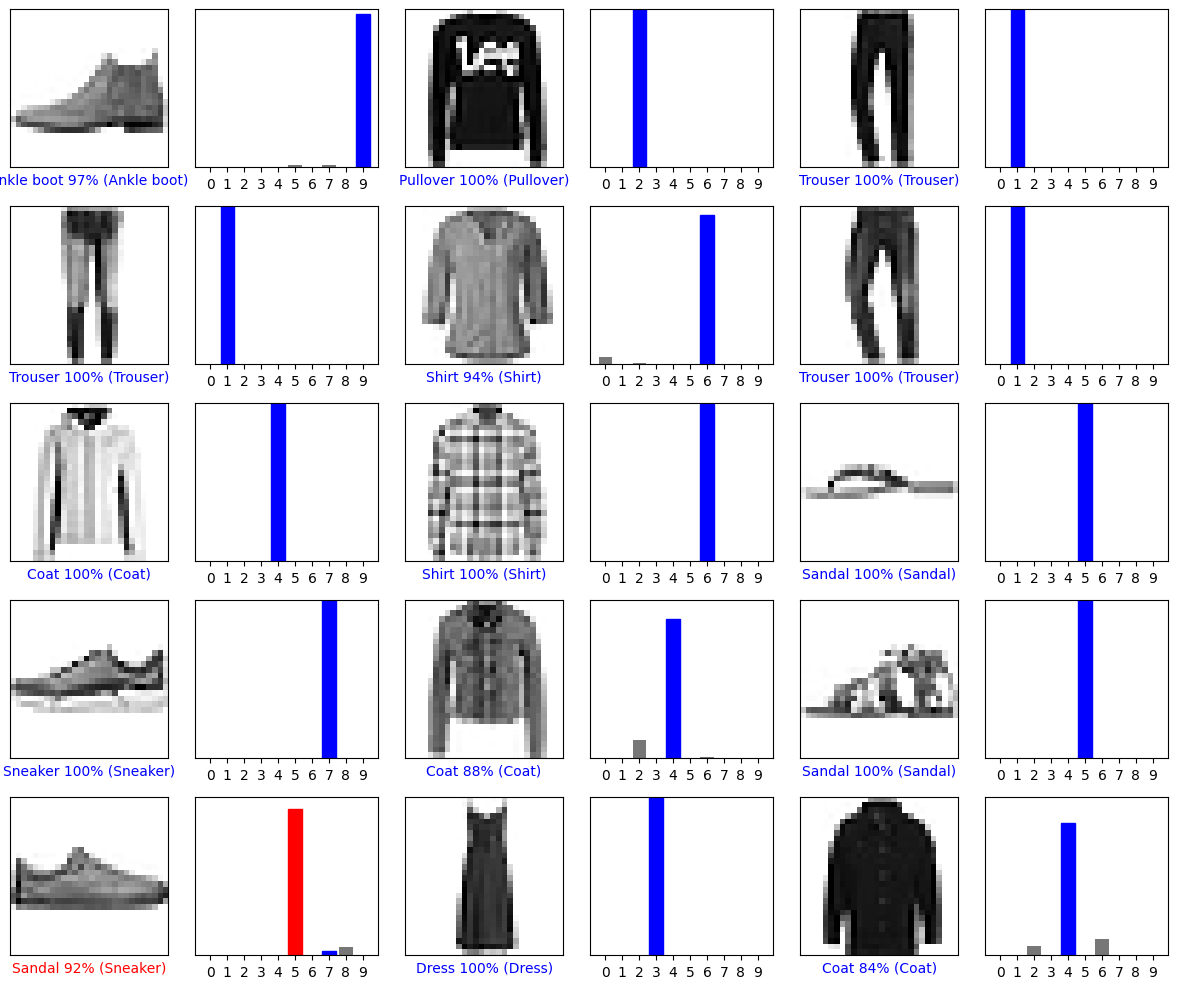

In [21]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Use the trained model
Finally, use the trained model to make a prediction about a single image

In [22]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [23]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [24]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 10ms/step
[[3.0992174e-04 1.9367803e-14 9.9955994e-01 6.9741481e-14 1.2353939e-04
  5.0556715e-11 6.5904674e-06 1.2063600e-18 9.3169777e-12 1.6414644e-15]]


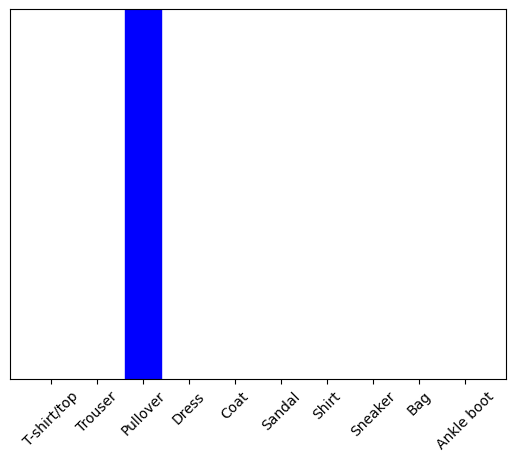

In [25]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()